The data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from census.gov.
● The NICS data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.
● The U.S. census data is found
in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one
year.


What census data is
most associated with
high gun per capita?
Which states have had
the highest growth in
gun registrations?
What is the overall
trend of gun
purchases?

In [1]:
# import libaries
import pandas as pd #import data
import numpy as np #numerical calculation
import seaborn as sns #more beautiful plots
import matplotlib.pyplot as plt # plots
%matplotlib inline

# Data Wrangling
> In this stage we will assess the data and also clean it after gathering.

In [2]:
# load our data set
gun_df = pd.read_excel("gun_data.xlsx")

In [3]:
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
#load the census dataframe which is a csv file
census_df = pd.read_csv("U.S. Census Data.csv", sep=",")

In [6]:
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

# Data Cleaning Issues
- The data type for `gun_df`
    >- change data type for `states` to string
    >- change data type for `month` to datetime
    
- The `census_df`
    >- we need to create a state colunm which will house all data for states

In [8]:
gun_df["state"].value_counts()

Illinois                227
Oklahoma                227
Nebraska                227
Maryland                227
New Jersey              227
South Carolina          227
Arkansas                227
Arizona                 227
South Dakota            227
Oregon                  227
Iowa                    227
Texas                   227
New Hampshire           227
Alaska                  227
Rhode Island            227
Alabama                 227
New York                227
Montana                 227
Maine                   227
Tennessee               227
Idaho                   227
Indiana                 227
Puerto Rico             227
Connecticut             227
Wyoming                 227
Delaware                227
Virgin Islands          227
New Mexico              227
Ohio                    227
Wisconsin               227
Nevada                  227
West Virginia           227
Washington              227
Pennsylvania            227
Louisiana               227
Guam                

In [9]:
#change data type for states to string
gun_df[["state"]] = gun_df[["state"]].astype("string")

In [10]:
#change data type for month to datetime
gun_df[["month"]] = gun_df[["month"]].astype("datetime64")

In [11]:
gun_df.state = gun_df.state.astype("string")

In [12]:
# using the melt function
census_df_new = pd.melt(census_df, id_vars=["Fact"], value_vars=["Alaska", "Idaho", "New Mexico", "Delaware", "Montana", "Vermont",
                                                             "Wisconsin", "Alabama", "Utah", "Indiana",
                                                             "Colorado", "Oregon", "Nebraska", "Georgia", "Oklahoma",
                                                             "New Jersey", "Ohio", "Maine", "Wyoming",
                                                             "Louisiana","Pennsylvania", "Hawaii", "Missouri", "Maryland",
                                                             "Arkansas", "Arizona", "Florida",
                                                             "Rhode Island", "Texas", "South Carolina", "Iowa", "New York",
                                                             "Connecticut", "South Dakota", "Tennessee", "California", "North Dakota",
                                                             "Michigan", "North Carolina", "Illinois", "Kansas", "New Hampshire",
                                                             "Kentucky", "Massachusetts", "Nevada", "Washington", "Virginia", "Minnesota",
                                                             "Mississippi", "West Virginia"])

In [16]:
census_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fact      4000 non-null   string
 1   variable  4250 non-null   string
 2   value     3250 non-null   object
dtypes: object(1), string(2)
memory usage: 99.7+ KB


In [14]:
census_df_new.head()

,Fact,variable,value
0,"Population estimates, July 1, 2016, (V2016)",Alaska,"741,894"
1,"Population estimates base, April 1, 2010, (V2...",Alaska,"710,249"
2,"Population, percent change - April 1, 2010 (es...",Alaska,4.50%
3,"Population, Census, April 1, 2010",Alaska,"710,231"
4,"Persons under 5 years, percent, July 1, 2016, ...",Alaska,7.30%


In [15]:
#change data type to string
census_df_new[["Fact"]] = census_df_new[["Fact"]].astype("string")
census_df_new[["variable"]] = census_df_new[["variable"]].astype("string")

In [17]:
#using the drop function
gun_df = gun_df.drop(["prepawn_handgun", "private_sale_other"], axis=1)

In [18]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  string        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_long_gun           10540 non-null  float64       
 10  prepawn_other              5115 non-null   float64       
 11  redemption_handgun         10545 non-null  float64       
 12  rede

In [24]:
# rename variable to state in the census dataframe

census_df_new.rename(index = str, columns={"variable" : "state"}, inplace = True)

In [25]:
census_df_new

,Fact,state,value
0,"Population estimates, July 1, 2016, (V2016)",Alaska,"741,894"
1,"Population estimates base, April 1, 2010, (V2...",Alaska,"710,249"
2,"Population, percent change - April 1, 2010 (es...",Alaska,4.50%
3,"Population, Census, April 1, 2010",Alaska,"710,231"
4,"Persons under 5 years, percent, July 1, 2016, ...",Alaska,7.30%
...,...,...,...
4245,FN,West Virginia,NaN
4246,<NA>,West Virginia,NaN
4247,S,West Virginia,NaN
4248,X,West Virginia,NaN


In [26]:
#using the append method to join the two dataframes of "gun_df" and "census_df_new"
gun_census = gun_df.append([census_df_new])

In [27]:
gun_census

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Fact,value
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,21.0,...,0.0,0.0,9.0,16.0,0.0,0.0,3.0,32019.0,<NA>,NaN
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,2.0,...,0.0,0.0,17.0,24.0,0.0,0.0,0.0,6303.0,<NA>,NaN
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,6.0,...,0.0,0.0,38.0,12.0,0.0,0.0,0.0,28394.0,<NA>,NaN
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,13.0,...,0.0,0.0,13.0,23.0,0.0,2.0,1.0,17747.0,<NA>,NaN
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506.0,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,NaT,West Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FN,NaN
4246,NaT,West Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4247,NaT,West Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN
4248,NaT,West Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN


In [28]:
gun_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16735 entries, 0 to 4249
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      16735 non-null  string        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12462 non-null  float64       
 9   prepawn_long_gun           10540 non-null  float64       
 10  prepawn_other              5115 non-null   float64       
 11  redemption_handgun         10545 non-null  float64       
 12  redemption

# Insights

- State with highest long gun
- State with highest hand gun

In [29]:
gun_census_clean = gun_census.copy()

In [41]:
#Handgun
gun_census_h = gun_census_clean.groupby(["state"],
                                         as_index = False)["handgun"].sum();

In [42]:
#Longgun
gun_census_l = gun_census_clean.groupby(["state"],
                                         as_index = False)["long_gun"].sum();

In [43]:
#sorting handgun in descending order
gun_census_h1 = gun_census_h.sort_values(by = ["handgun"], ascending = False).head(10)

In [44]:
#sorting long_gun in descending order
gun_census_l1 = gun_census_l.sort_values(by = ["long_gun"], ascending = False).head(10)

In [51]:
gun_census_h1

,state,handgun
46,Texas,6493832.0
4,California,5910880.0
9,Florida,5909952.0
37,Ohio,3791457.0
45,Tennessee,3117004.0
50,Virginia,2885493.0
5,Colorado,2528422.0
14,Illinois,2434983.0
27,Missouri,2418598.0
0,Alabama,2222037.0


> From the output above Texas had the highest number of handgun. This was followed closesly by California and Florida.

In [46]:
gun_census_l1

,state,long_gun
40,Pennsylvania,9383642.0
46,Texas,7651396.0
4,California,5936770.0
9,Florida,3829090.0
37,Ohio,3646325.0
27,Missouri,3071938.0
35,North Carolina,2962831.0
45,Tennessee,2866345.0
50,Virginia,2861010.0
24,Michigan,2860539.0


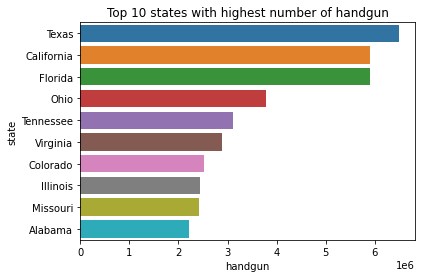

In [49]:
sns.barplot(y = "state", x = "handgun", data = gun_census_h1)
plt.title("Top 10 states with highest number of handgun");

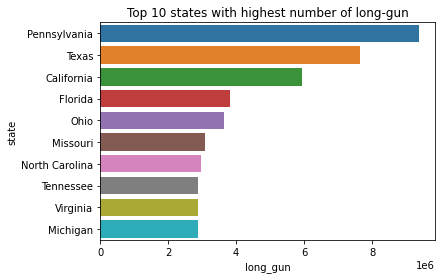

In [50]:
sns.barplot(y = "state", x = "long_gun", data = gun_census_l1)
plt.title("Top 10 states with highest number of long-gun");